<font color='green'>
    
## **Analizado los crímenes en la Ciudad de Nueva York**
***
#### _C. Contreras -  C. Vera_
</font>


### Hito 1
## I. PRELIMINARES

**Descripción del problema y objetivos** <br>
Basándose en el dataset  **_stop_and_frisk_data.csv_** , el que corresponde a datos públicos del departamento policial de Nueva York,
se  abordarán dos problemas de clasificación binaria, considerando que la mayoría de las variables son de tipo categóricas, de esta manera se puede estimar la probabilidad de pertenencia a una determinada clase binarizada. <br>
1. Primero, se requiere  predecir si un determinado precedimiento policial concluirá en un arresto o no, para ello se generará un modelos predictivos, el que será depurado según los resultados de las métricas resultantes.<br> En este problema se considerará la variable objetivo **'arstmade'**, la cual indica si el procedimiento policial terminá en arresto o no, de acuerdo a las características medidas del sospechoso.<br>

2. Segundo, se requiere predecir si el procedimiento policial concluirá en una acción violenta, para ellos se generará un nueva variable objetivo llamada **'force_process'** que incluye atributos que indican violencia, como 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_baton','pf_hcuff', 'pf_pepsp', 'pf_other', entre otros. Para este problema se generarán 5 modelos predictivos.

Para ambos problemas, se utilizarán los datos correspondientes al año 2009 como conjunto de entrenamiento y los datos del 2010 como conjunto de test.

* **Cómo implementaremos la solución.** <br>
La metodología consiste  en analizar las 111 variables del dataset: ingesta de datos, pre procesamiento, visualización y modelación. Lo que corresponde a lo siguiente:    
    
    1. Importación y limpieza dataset
    - Normalización de la cantidad de atributos con la función create_suitable_dataframe, del script dado: _preproc_nyc_sqf.py_
    - Visualización y reporte de valores perdidos
    - Recodificación de variables
    - Visualización de frecuencias 
    - Generación de modelo predictivo
    - Reporte de métricas de desempeño
    - Depuración de modelos 
    - Generación de 5 nuevos modelos predictivos
    - Reporte de métricas de desempeño para los modelos
    - Selección de los 2 mejores modelos y serializarlos con la nomenclatura: nombre_grupo-modelo-1 y nombre_grupo-modelo-2 .
    
    

* **Criterios de optimización y métricas de desempeño.** <br>
Para la evaluación de los resultados y determinar cuál es el mejor modelo se realizara lo siguiente:

     - Análisis de los 5 modelos  y sus predicciones ocupando las siguientes métricas:
     - Precision, recall, f1 y accuracy en base a una matríz de confusión
     


## II. ASPECTOS  COMPUTACIONALES
* **Librerías a utilizar**
    - Para visualzación de datos:
         - **numpy** versión 1.17.2
         - **pandas** versión 0.25.1
   
    - Para graficar:
        - **matplotlib.pyplot** versión 3.1.1
        - **seaborn** versión 0.9.0
    - Para algoritmos de clasificacion: **sklearn** versión y 0.21.3
    - Python versión 3.7.3

* **Fuciones auxiliares y su objetivo**
    - Se usará la función **preproc_nyc_sqf**  para normalizar la cantidad de atributos.
   
* **modelos con una grilla de hiperparámetros tentativa (5)**<br>
    1.Para LogisticRegression: <br> params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}<br>
    
    2.Para Random Forest: <br> params = {'max_features':[None, 'log2', 'sqrt'], 'n_estimators': [50,100,150,200,250,500], 'max_depth':[None, 2, 5, 7, 10]} <br>

    3.Para AdaBoostClassifier: <br> params = {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000]}<br>
    
    4.Para GradientBoostingClassifier: <br> params = {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000],'subsample': [0.1, 0.5, 0.9]}<br>

    5.Para SVC: <br> params = {'C': 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'gamma': 'C': [0.0000001, 0.0001, 0.001, 0.01, 1, 10]}

### III. ANALISIS EXPLORATORIO
* Análisis descriptivo considerando el tipo de variables
* Medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre las variables a analizar
* Estrategia de preprocesamiento (datos perdidos, recodificaciones).

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#from IPython.display import HTML, display
import missingno as msno
from imblearn.over_sampling import SMOTE #0.5.0

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, recall_score
import preproc_nyc_sqf as prep

In [4]:
df_train= pd.read_csv('2009_1perc.csv').drop(columns = 'Unnamed: 0', axis=1)
df_test = pd.read_csv('2010_1perc.csv').drop('Unnamed: 0',axis =1)

In [5]:
df_test.shape


(6013, 111)

In [6]:
df_train.shape

(5812, 111)

In [7]:
df_train.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20


In [8]:
df_train.describe()

,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight,addrpct,linecm,detailcm
count,5812.0,5812.000000,5812.000000,5.812000e+03,5812.000000,5812.000000,5812.000000,5812.0,5812.0,5812.000000,5812.000000,5.812000e+03,5812.000000,5812.000000,5812.000000,5812.000000,5812.000000,5812.0,5812.000000
mean,2009.0,69.051617,5769.119924,6.255350e+06,1426.219202,2.665893,5.501893,0.0,0.0,252.115795,249.074845,6.941142e+06,28.874054,5.188231,6.414315,169.942533,69.051617,1.0,37.488644
std,0.0,32.846903,5524.955522,3.447243e+06,736.239726,4.816704,5.922592,0.0,0.0,305.058678,306.222306,3.552806e+06,26.067172,0.402213,3.446479,37.653637,32.846903,0.0,25.059538
min,2009.0,1.000000,1.000000,1.012009e+06,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000,1.000000,1.0,6.000000
25%,2009.0,42.000000,1902.750000,3.172009e+06,1030.000000,1.000000,3.000000,0.0,0.0,70.000000,67.000000,4.061986e+06,19.000000,5.000000,4.000000,150.000000,42.000000,1.0,20.000000
50%,2009.0,73.000000,4347.000000,6.142009e+06,1605.000000,1.000000,5.000000,0.0,0.0,105.000000,103.000000,7.121980e+06,25.000000,5.000000,7.000000,170.000000,73.000000,1.0,28.000000
75%,2009.0,102.000000,7616.750000,9.192009e+06,2035.000000,3.000000,5.000000,0.0,0.0,178.000000,178.750000,1.012198e+07,34.000000,5.000000,9.000000,180.000000,102.000000,1.0,46.000000
max,2009.0,123.000000,31694.000000,1.231201e+07,2830.000000,200.000000,200.000000,0.0,0.0,879.000000,879.000000,1.231199e+07,999.000000,7.000000,11.000000,999.000000,123.000000,1.0,113.000000


#### Normalización de la cantidad de atributos, con la función _create_suitable_dataframe_ para igualar el benchmark de los atributos.

In [9]:
df_train_proc, cat_attributes, num_attributes = prep.create_suitable_dataframe(df_train)

['year', 'pct', 'ser_num', 'datestop', 'timestop', 'perstop', 'compyear', 'comppct', 'repcmd', 'revcmd', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight', 'addrpct', 'linecm', 'detailcm', 'perobs']


In [10]:
df_train_proc.shape

(4636, 74)

Corrección de un valor de la variable **city** en la matriz de test para que se llame igual que en el conjunto de entrenamiento.

In [11]:
df_test['city'] = np.where(df_test['city'] == 'STATEN IS' ,'STATEN ISLAND', df_test['city'])

In [12]:
df_train.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,meters,month,age_individual
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,7,,1013067,0238633,CM,1,20,1.79832,4,24.0
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,U,,1012043,0212157,CM,1,14,1.67640,10,NaN
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,U,,1017599,0240200,CM,1,20,1.92024,10,21.0
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,4,35,1002625,0183442,CM,1,24,1.67640,12,22.0
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,U,,1024535,0209890,CM,1,20,1.70688,12,NaN


#### Varibale Objetivo: **_arstmade_** (Was an arresst made?)
Corresponde a una variable categórica que indica si el procedimiento policial concluirá en arresto o no.

In [13]:
df_train_proc['arstmade'].value_counts()

N    4355
Y     281
Name: arstmade, dtype: int64

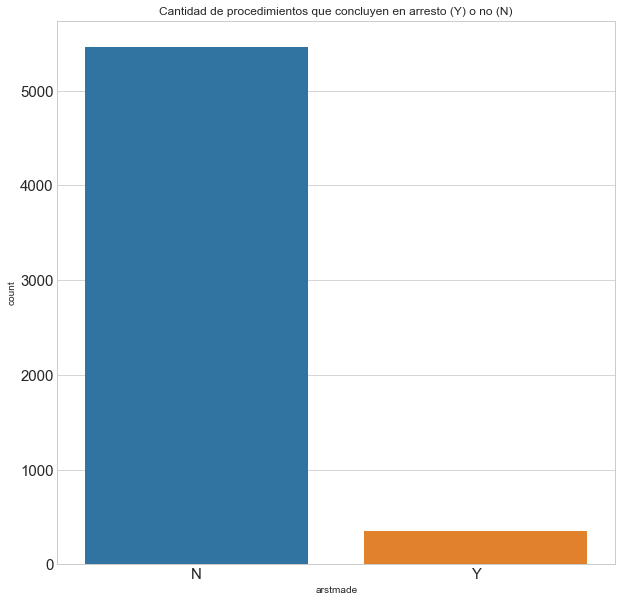

In [14]:
#VARIABLE ARSTMADE
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.title('Cantidad de procedimientos que concluyen en arresto (Y) o no (N)')
sns.countplot(x = 'arstmade', data = df_train);

Del gráfico se desprende que 4355 procedimientos policiales no termina en arresto,siendo la mayoría, en comparación a 281 procedimientos que sí terminan en arresto.

### Gráficos de variables que caracterizan al sujeto
'sex','race','dob','age','ht_feet','ht_inch','weight','haircolr','eyecolor','build'

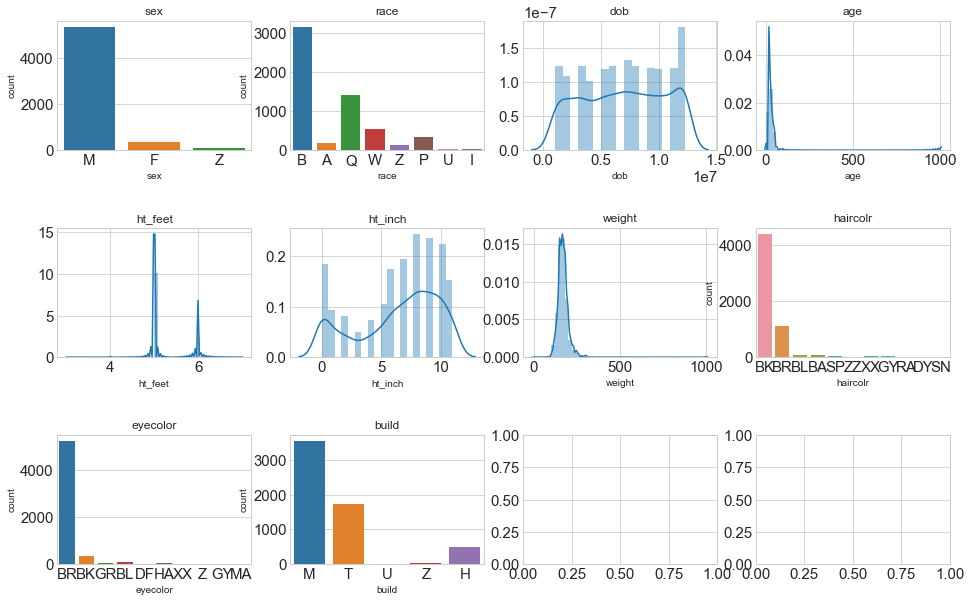

In [15]:
var_individuo = ['sex','race','dob','age','ht_feet','ht_inch','weight','haircolr','eyecolor','build']
df_train_ind = df_train.loc[:,var_individuo]

plt.subplots(3,4, figsize=(16,10))
plt.subplots_adjust(hspace=0.6)
for index, (colnames, serie) in enumerate(df_train_ind.iteritems()):
    plt.subplot(3,4,index+1)
    if serie.dtype == 'object':
        sns.countplot(df_train_ind[colnames])
    else:
        sns.distplot(df_train_ind[colnames])
    plt.title(colnames)

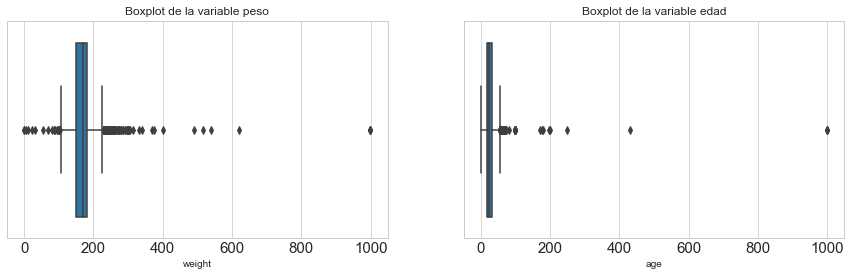

In [16]:
plt.subplots(1,2,figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(df_train_ind['weight'])
plt.title('Boxplot de la variable peso')
plt.subplot(1,2,2)
sns.boxplot(df_train_ind['age'])
plt.title('Boxplot de la variable edad');

En las variables **weight** y **age** se encuentran outliers muy extremos los cuales se eliminarán ya que los datos no tienen sentido y es muy probable que estos sean errores.


In [17]:
df_train = df_train.drop(df_train[df_train['age'] >= 99]['age'].index, axis = 0)
df_train = df_train.drop(df_train[df_train['weight'] >500]['age'].index, axis = 0)

#### Analisis variables
- Se observan varibles con distribuciones muy parecidas a la normal. 
- La variable objetivo presenta clases gravemente desbalanceadas por lo que mas adelante, en la ingenieria de atributos, sería buena idea aplicar un oversampling 

#### Valores perdidos

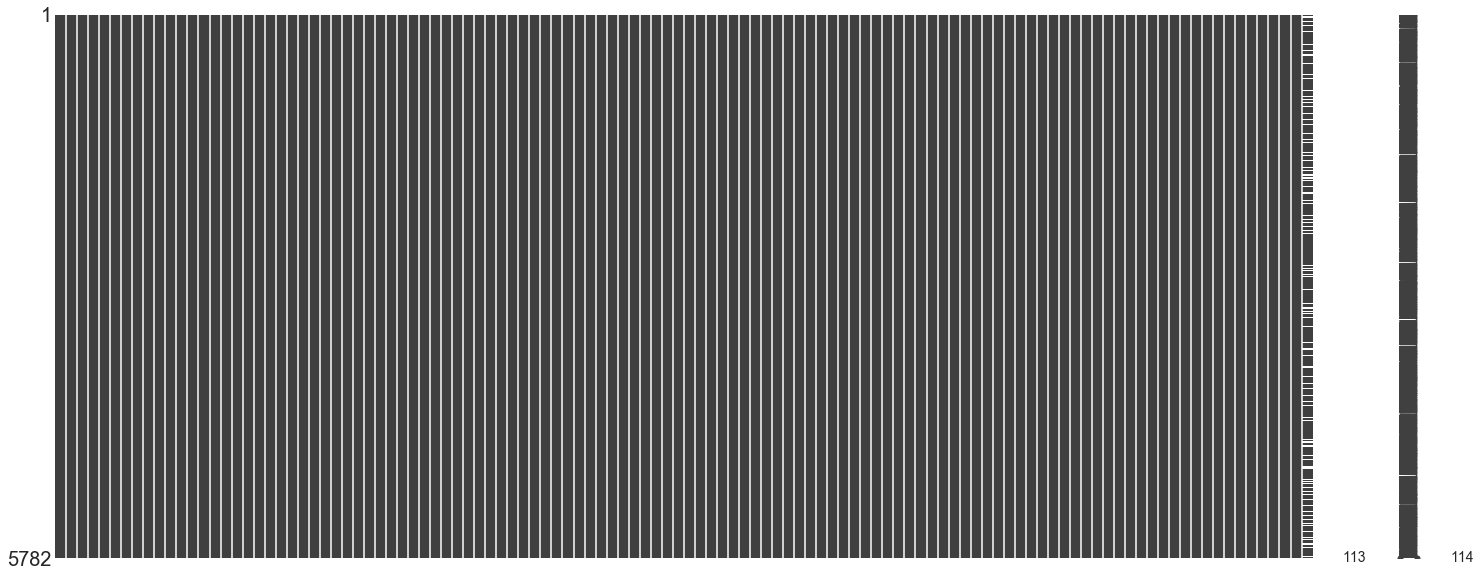

In [18]:
#matriz de valores nulos df
msno.matrix(df_train)
plt.show()


In [19]:
df_train.isnull().sum().sort_values(ascending=False)

age_individual    1165
asltweap             0
machgun              0
othrweap             0
pf_hands             0
                  ... 
sex                  0
race                 0
dob                  0
age                  0
year                 0
Length: 114, dtype: int64

In [20]:
df_train['age_individual'].isna().sum()/len(df_train)

0.2014873746108613

La variable **age_individual** es la unica que presenta valores nulos el cual representa el 20% de dataframe

### IV. FEATURE ENGINEERING
* Recodificaciones y transformaciones a realizar.

### 1. DF modelo _arstmade_ (Was an arresst made?) 

#### BINARIZACION DE VARIABLES 

In [95]:
df_train['arstmade'] = np.where(df_train['arstmade'] == 'Y',1,0)
df_test['arstmade'] = np.where(df_test['arstmade'] == 'Y',1,0)

### Variables que caracterizan al sujeto a incluir en el df2 (train y test):
Corresponden a una serie de variables (10) que permiten determinar las características del sospechoso.
- 'sex'
- 'race'
- 'dob'
- 'age'
- 'ht_feet' 
- 'ht_inch'
- 'weight'
- 'haircolr'
- 'eyecolor'
- 'build'

In [22]:
df_train_2 = df_train.loc[:,['arstmade','sex','race','dob','age','ht_feet','ht_inch','weight','haircolr','eyecolor','build']]
df_test_2 = df_test.loc[:,['arstmade','sex','race','dob','age','ht_feet','ht_inch','weight','haircolr','eyecolor','build']]

In [23]:
df_train_2 = pd.get_dummies(df_train_2, drop_first=True)
df_test_2 = pd.get_dummies(df_test_2, drop_first=True)

In [24]:
x_train = df_train_2.drop('arstmade',axis = 1)
y_train = df_train_2['arstmade']
x_test = df_test_2.drop('arstmade',axis = 1)
y_test = df_test_2['arstmade']

In [25]:
df_train_2.head()

,arstmade,dob,age,ht_feet,ht_inch,weight,sex_M,sex_Z,race_B,race_I,...,eyecolor_GR,eyecolor_GY,eyecolor_HA,eyecolor_MA,eyecolor_XX,eyecolor_Z,build_M,build_T,build_U,build_Z
0,0,7111984,24,5,9,145,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,12151993,15,5,5,140,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,7031987,21,6,3,220,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,3131986,22,5,5,120,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,9221991,18,5,6,165,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5782, 37)
(5782,)
(6013, 37)
(6013,)


#### Correlaciones de variable arstmade con df_train_2 sin aplicar función de normalización  de atributos ( _create_suitable_dataframe_)


In [27]:
df_train_2.corr()[['arstmade']].sort_values(by = 'arstmade', ascending = False).style.background_gradient(cmap='viridis')

,arstmade
arstmade,1
age,0.0428783
haircolr_BL,0.0334435
eyecolor_GR,0.0334151
haircolr_SP,0.0264671
eyecolor_HA,0.0244154
build_U,0.0235891
eyecolor_DF,0.0172946
haircolr_RA,0.0144297
haircolr_GY,0.0144065


- En base a la correlación de los atributos del df asrtmade, se observa que la probabilidad de ser arrestado se influencia mayormente con variables como la edad,el color de pelo (blond) y ojos (green). 

#### Frecuencias de clases del vector objetivo arstmade

In [28]:
df_train_2['arstmade'].value_counts('%')

0    0.939813
1    0.060187
Name: arstmade, dtype: float64

#### SMOTE para balanceo de clases minoritarias

In [29]:
smote = SMOTE(random_state=1, sampling_strategy = 'minority')
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train,y_train)

#### Probabilidad que un individuo sea arrestado en uno de los cinco barrios, condicional al género y condicional a la raza

In [30]:
df_prob = df_train.groupby(['city','race','sex'])['arstmade'].value_counts('%')

In [31]:
df_prob = df_prob.rename_axis(['Barrio','Raza','Genero','Arresto']).reset_index(name='Probabilidad')

In [32]:
pd.set_option('display.max_rows',100)
df_prob[df_prob['Arresto']==1]

,Barrio,Raza,Genero,Arresto,Probabilidad
3,BRONX,B,F,1,0.064516
5,BRONX,B,M,1,0.047146
10,BRONX,P,M,1,0.063830
14,BRONX,Q,M,1,0.062016
20,BRONX,W,M,1,0.029412
26,BROOKLYN,A,M,1,0.035714
28,BROOKLYN,B,F,1,0.130952
30,BROOKLYN,B,M,1,0.039305
37,BROOKLYN,Q,F,1,0.083333
39,BROOKLYN,Q,M,1,0.053512


### 2. DF modelo  __'force_process'__

### Generacion varibale objetivo: 'force_process'
Para la generación de esta variable objetivo se incluyeron las observaciones que presentaron uso de fuerza física por parte del policía.
#### **_pf_xx_** (PHYSICAL FORCE USED BY OFFICER)
Corresponde a una serie de variables (9) que permiten determinar si el procedimiento policial concluirá en alguna acción violenta, basado en el uso de fuerza física usado por el oficial de policía. Las variables a recodificar son:

- pf_hands
- pf_wall
- pf_grnd
- pf_drwep
- pf_ptwep
- pf_baton
- pf_hcuff
- pf_pepsp
- pf_other


In [33]:
#filtro de variables pf_xxx
force_process = df_train.filter(regex='^pf_',axis = 1)

In [34]:
force_process.columns

Index(['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton',
       'pf_hcuff', 'pf_pepsp', 'pf_other'],
      dtype='object')

In [35]:
df_train_3 = df_train.copy()
df_test_3 = df_test.copy()

Uso de sentencias lógicas para binarizar variables atribuidas a uso de violencia

In [36]:
logical_sentence_train = (df_train_3['pf_wall'] == 'Y') | (df_train_3['pf_drwep'] == 'Y') |\
                (df_train_3['pf_hands'] == 'Y') | (df_train_3['pf_grnd'] == 'Y') |\
                (df_train_3['pf_ptwep'] == 'Y') | (df_train_3['pf_baton'] == 'Y')|\
                (df_train_3['pf_hcuff'] == 'Y') | (df_train_3['pf_pepsp'] == 'Y')|\
                (df_train_3['pf_other'] == 'Y')

In [37]:
logical_sentence_test = (df_test_3['pf_wall'] == 'Y') | (df_test_3['pf_drwep'] == 'Y') |\
                (df_test_3['pf_hands'] == 'Y') | (df_test_3['pf_grnd'] == 'Y') |\
                (df_test_3['pf_ptwep'] == 'Y') | (df_test_3['pf_baton'] == 'Y') |\
                (df_test_3['pf_hcuff'] == 'Y') | (df_test_3['pf_pepsp'] == 'Y') |\
                (df_test_3['pf_other'] == 'Y')

In [38]:
df_train_3['force_process'] = np.where(logical_sentence_train,1,0)
df_test_3['force_process'] = np.where(logical_sentence_test,1,0)

df_train_3.drop(force_process.columns, axis = 1, inplace=True)
df_test_3.drop(force_process.columns, axis = 1, inplace=True)

In [39]:
atributos_modelo_2 =['timestop','inout','othpers','arstmade','frisked','searched','contrabn','adtlrept','pistol',
                     'riflshot','knifcuti','machgun','othrweap','rf_vcrim','rf_othsw','rf_attir','rf_vcact',
                     'rf_rfcmp','rf_verbl','rf_knowl','rf_furt','rf_bulg','cs_objcs','cs_descr','cs_casng','cs_lkout',
                     'cs_cloth','cs_drgtr','cs_furtv','cs_vcrim','cs_bulge','cs_other','sex','race','age','ht_feet',
                     'ht_inch','weight','haircolr','eyecolor','build','city','sector','force_process']

In [40]:
df_train_3 = df_train_3.loc[:,atributos_modelo_2]
df_test_3 = df_test_3.loc[:,atributos_modelo_2]

Función para parcializar en rangos de: **mañana, dia, tarde y noche**, las horas en que se realizaron las detenciones

In [41]:
def func_momento(hour):
    if hour <=700:
        momento = "noche"
    elif hour >700 and hour <=1200:
        momento = "mañana"
    elif hour >1200 and hour <=1900:
        momento = "dia"
    elif hour >1900:
        momento = "tarde"
    return momento

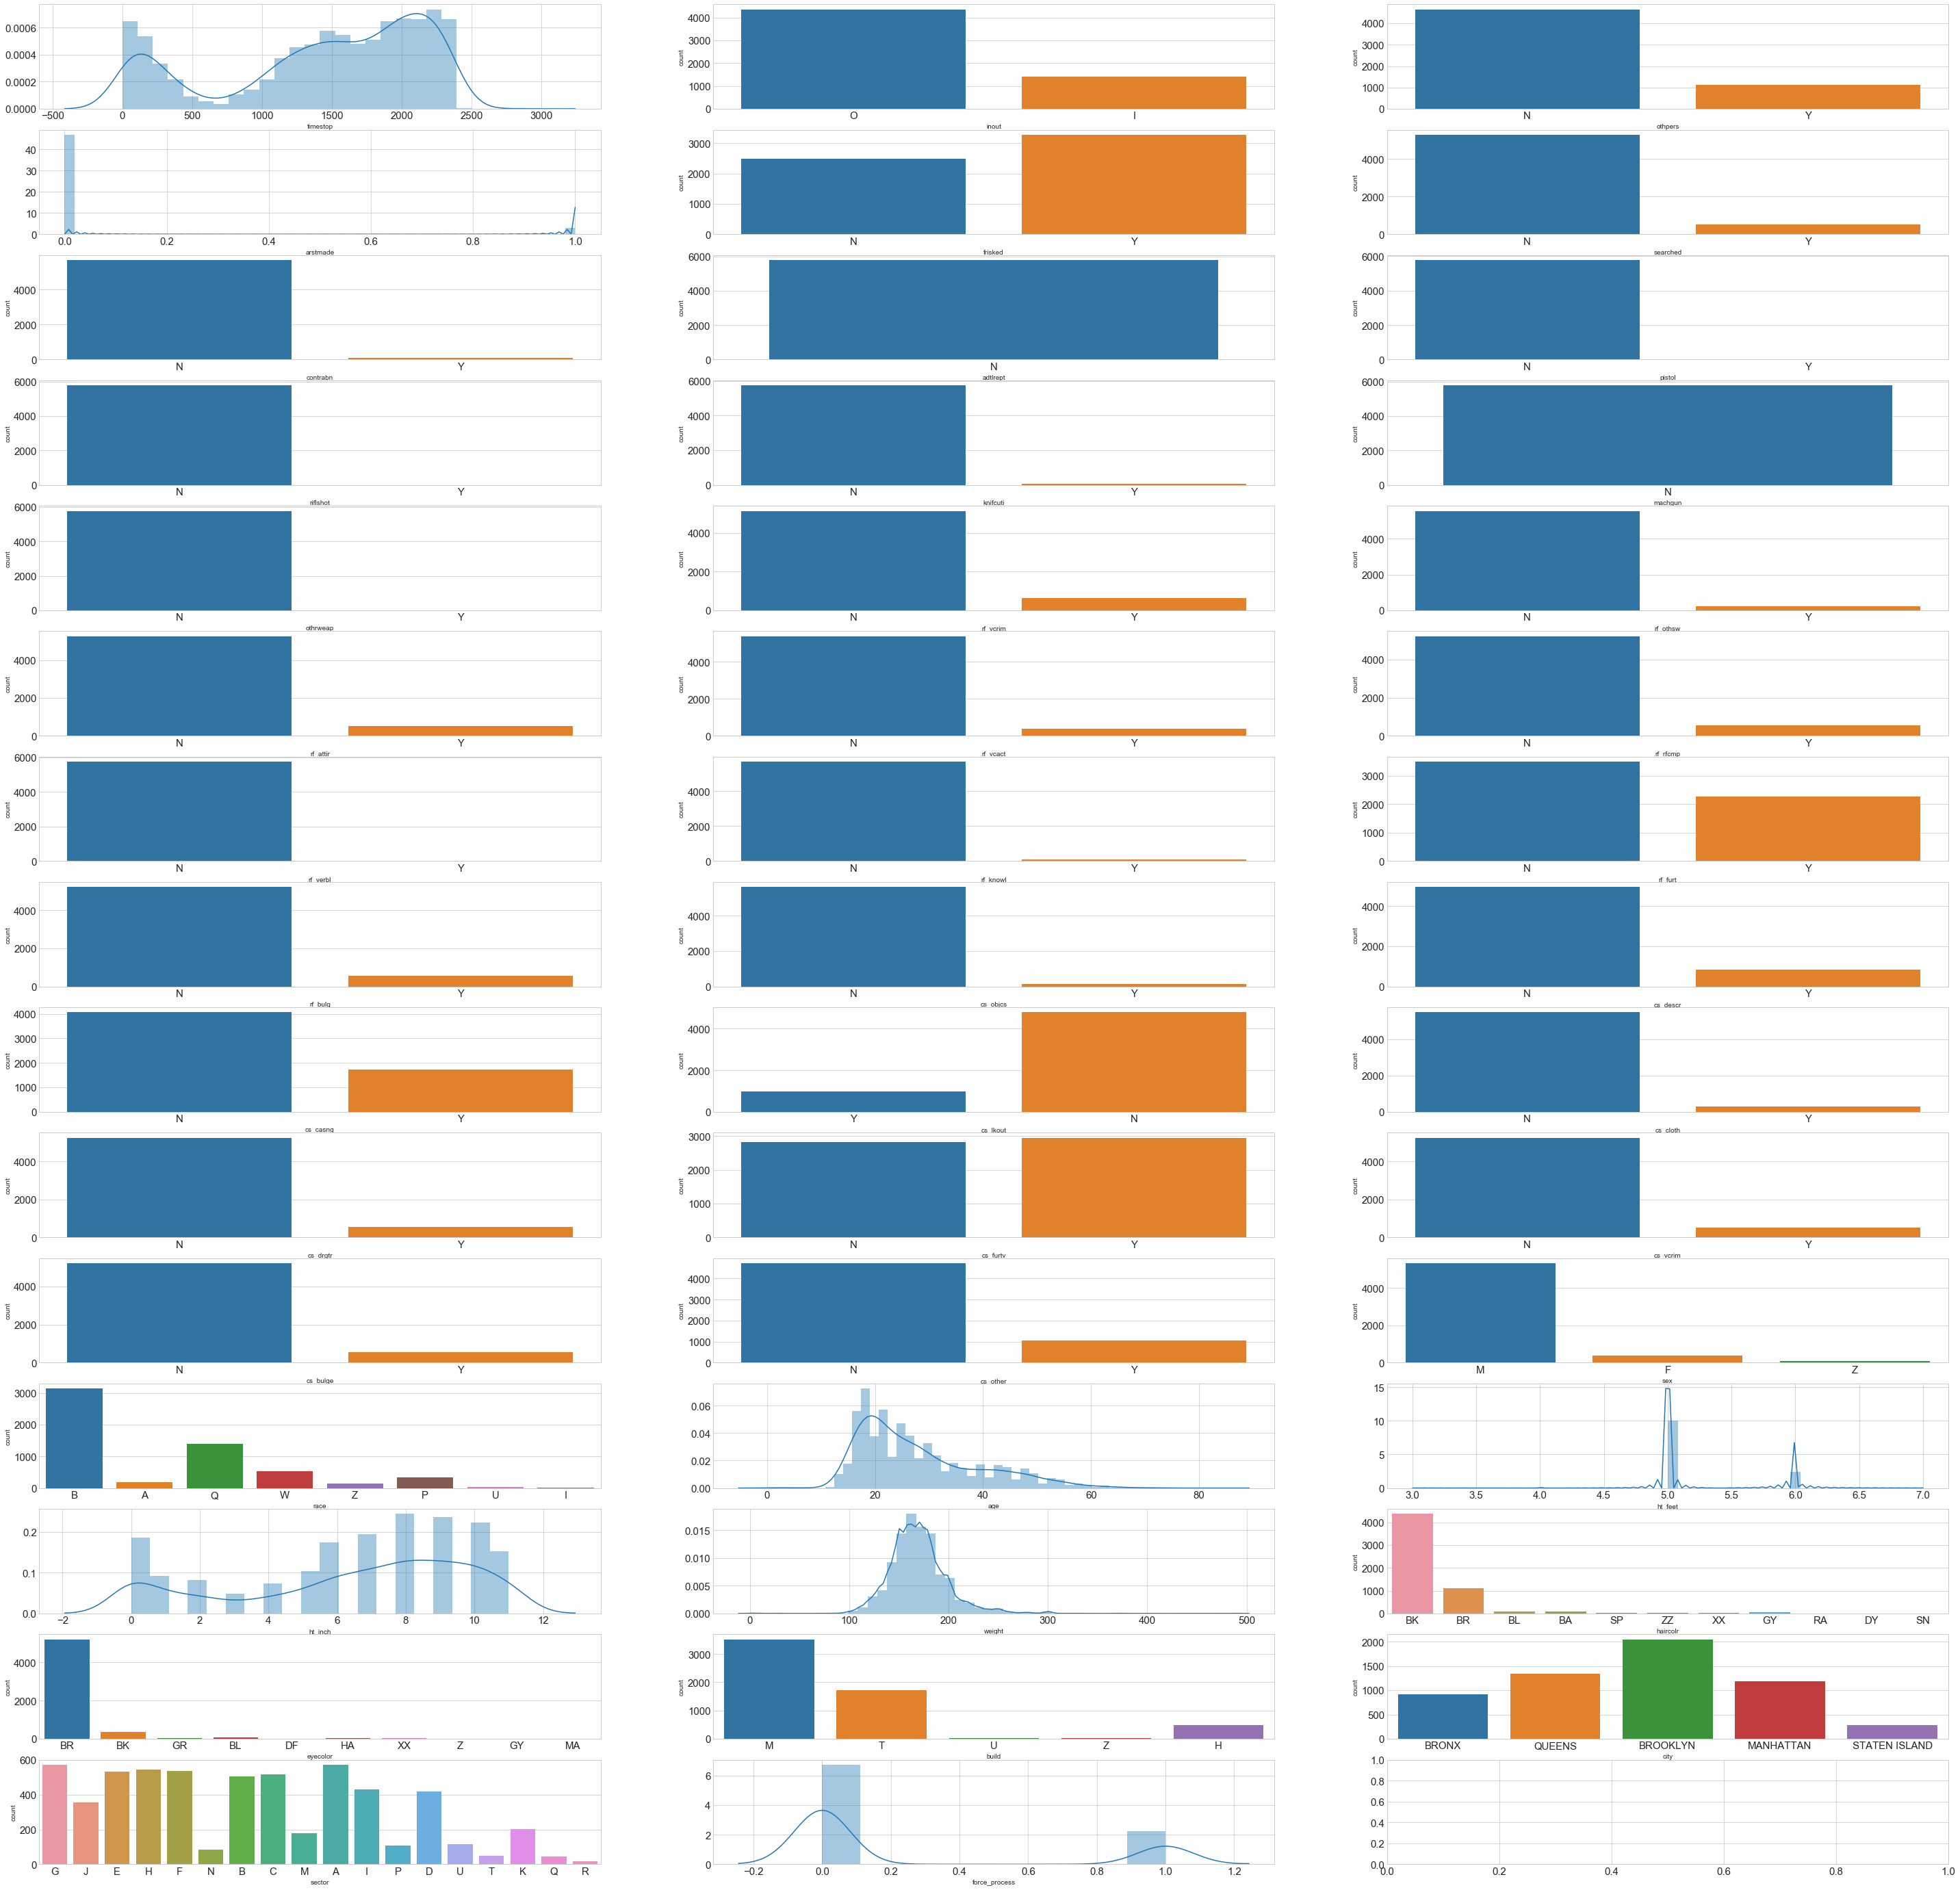

In [42]:
atributos_modelo_2 =['timestop','inout','othpers','arstmade','frisked','searched','contrabn','adtlrept','pistol',
                     'riflshot','knifcuti','machgun','othrweap','rf_vcrim','rf_othsw','rf_attir','rf_vcact',
                     'rf_rfcmp','rf_verbl','rf_knowl','rf_furt','rf_bulg','cs_objcs','cs_descr','cs_casng','cs_lkout',
                     'cs_cloth','cs_drgtr','cs_furtv','cs_vcrim','cs_bulge','cs_other','sex','race','age','ht_feet',
                     'ht_inch','weight','haircolr','eyecolor','build','city','sector','force_process']

plt.subplots(15,3, figsize=(50,50))
plt.subplots_adjust(hspace=0.2)
for index, (colnames, serie) in enumerate(df_train_3.iteritems()):
    plt.subplot(15,3,index+1)
    if serie.dtype == 'object':
        sns.countplot(df_train_3[colnames])
    else:
        sns.distplot(df_train_3[colnames])

Aplicar la función momento a los conjuntos de train y test

In [43]:
df_train_3['timestop'] = df_train_3['timestop'].apply(func_momento)
df_test_3['timestop'] = df_test_3['timestop'].apply(func_momento)

In [44]:
df_train_3['sector'] = np.where(df_train_3['sector'] == ' ', np.nan, df_train_3['sector'])
df_test_3['sector'] = np.where(df_test_3['sector'] == ' ', np.nan, df_test_3['sector'])

In [45]:
print(df_train_3['sector'].isnull().sum())
print(df_test_3['sector'].isnull().sum())

0
173


In [46]:
df_train_3.dropna(inplace=True)
df_test_3.dropna(inplace=True)

Eliminación del vector objetivo de los conjuntos de train y test

In [47]:
x_train_2 = df_train_3.drop('force_process',axis=1)
y_train_2 = df_train_3['force_process']
x_test_2 = df_test_3.drop('force_process',axis=1)
y_test_2 = df_test_3['force_process']

In [48]:
print(x_train_2.shape)
print(y_train_2.shape)
print(x_test_2.shape)
print(y_test_2.shape)

(5782, 43)
(5782,)
(5840, 43)
(5840,)


In [49]:
x_train_2 = pd.get_dummies(x_train_2, drop_first=True)
x_test_2 = pd.get_dummies(x_test_2, drop_first=True)

In [50]:
print(x_train_2.shape)
print(x_test_2.shape)

(5782, 89)
(5840, 89)


Identificación de columnas que no están en ambos conjuntos de train y test, para que sean eliminadas.

In [51]:
print('Columnas de x_train y no esta en x_test:')
for col in x_train_2.columns:
    if col not in list(x_test_2.columns):
         print(col)

Columnas de x_train y no esta en x_test:
haircolr_SN


In [52]:
print('Columnas de x_test y no esta en x_train:')
for col in x_test_2.columns:
    if col not in list(x_train_2.columns):
         print(col)

Columnas de x_test y no esta en x_train:
eyecolor_VI


In [53]:
x_train_2.drop('haircolr_SN',axis=1, inplace=True)
x_test_2.drop('eyecolor_VI',axis=1, inplace=True)

#### Correlaciones de variable force_process con df_train_3 sin aplicar función de normalización  de atributos ( _create_suitable_dataframe_)


In [54]:
df_train_3.corr()[['force_process']].sort_values(by = 'force_process', ascending = False).style.background_gradient()

,force_process
force_process,1
arstmade,0.135699
weight,0.0193137
ht_inch,0.0095225
ht_feet,0.00202321
age,-0.0537892


- En base a la correlación de los atributos del df force_process, se observa que las variables que influencian mayormente un arresto con uso de violencia son un arresto propiamente tal, el peso, altura y edad del sospechoso.

#### Frecuencias de clases del vector objetivo force_process

In [55]:
df_train_3['force_process'].value_counts('%')

0    0.749568
1    0.250432
Name: force_process, dtype: float64

----------------------------------------------

## V. MODELACION


### 1. MODELOS ARSTMADE

El modelo propuesto será RandomForest el cual será depurado posteriormente para analizar cuál modelo funciona mejor para este conjunto de datos.

#### 1.1 Random Forest arstmade

Para Random Forest, se realizó una busqueda por grilla para encontrar los mejores hiperparamétros, los cuales fueron 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150. Se probaron 50,100,150,200,250,500 estimadores, los cuales corresponden al numero de arboles que componen el bosque, sin embargo se optó por 150, ya que fue el mejor numero de estimadores encontrado por la búsqueda de grilla.

In [59]:
params = {'max_features': [None , 'log2' , 'sqrt'],'n_estimators': [10,50,100,150,200,250], 'max_depth':[None, 2,5,7,10]}

rf_model_gridcv = GridSearchCV(RandomForestClassifier(random_state = 1), params, cv=5, n_jobs=-1).fit(x_train_oversampled,y_train_oversampled)


In [60]:
rf_model_gridcv.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}

In [61]:
predictions = rf_model_gridcv.predict(x_test)
print(classification_report(y_test,predictions))
print('accuracy: ', round(accuracy_score(y_test,predictions),3))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5613
           1       0.10      0.04      0.05       400

   micro avg       0.91      0.91      0.91      6013
   macro avg       0.52      0.51      0.50      6013
weighted avg       0.88      0.91      0.89      6013

accuracy:  0.914


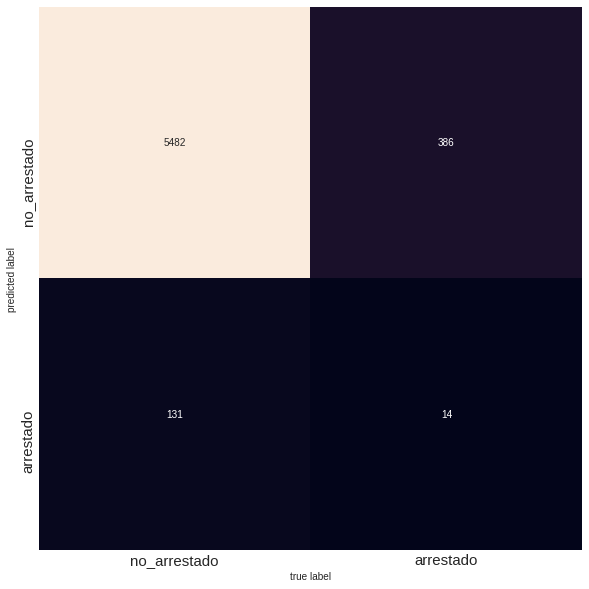

In [65]:

leyenda=['no_arrestado','arrestado']
mat = confusion_matrix(y_test, predictions)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=leyenda, 
    yticklabels=leyenda
)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [69]:
df_importances = pd.DataFrame(zip(x_train.columns,rf_model_gridcv.best_estimator_.feature_importances_), columns=['atributo', 'importance']).sort_values(by='importance', ascending=False)
df_importances.head(30)

,atributo,importance
0,dob,0.146628
4,weight,0.113845
1,age,0.089037
34,build_T,0.077797
3,ht_inch,0.077624
33,build_M,0.076790
10,race_Q,0.066000
7,race_B,0.062366
16,haircolr_BR,0.061279
14,haircolr_BK,0.058157


- Se seleccionarán los 30 atributos más relevantes y se reentrenará el modelo anterior

In [70]:
x_train_import = x_train.loc[:,list(df_importances.head(30)['atributo'])]
x_test_import = x_test.loc[:,list(df_importances.head(30)['atributo'])]

In [106]:
smote = SMOTE(random_state=1, sampling_strategy = 'minority')
x_train_oversampled_2, y_train_oversampled_2 = smote.fit_resample(x_train_import,y_train)

#### RandomForest con los 30 principales atributos

In [107]:
params = {'max_features': [None , 'log2' , 'sqrt'],'n_estimators': [10,50,100,150,200,250], 'max_depth':[None, 2,5,7,10]}

rf_model_gridcv_2 = GridSearchCV(RandomForestClassifier(random_state = 1), params, cv=5, n_jobs=-1).fit(x_train_oversampled_2,y_train_oversampled_2)


In [109]:
predictions = rf_model_gridcv_2.predict(x_test_import)
print(classification_report(y_test,predictions))
print('accuracy: ', round(accuracy_score(y_test,predictions),3))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5613
           1       0.10      0.07      0.08       400

   micro avg       0.90      0.90      0.90      6013
   macro avg       0.52      0.51      0.51      6013
weighted avg       0.88      0.90      0.89      6013

accuracy:  0.899


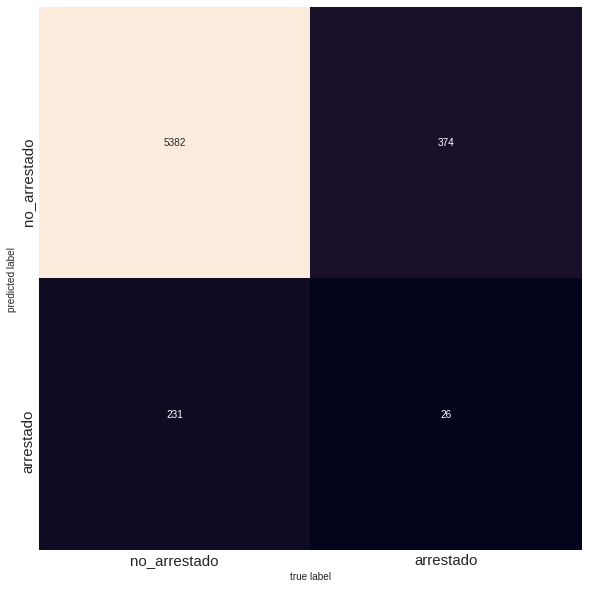

In [110]:
leyenda=['no_arrestado','arrestado']
mat = confusion_matrix(y_test, predictions)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=leyenda, 
    yticklabels=leyenda
)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

- En base a lo anterior se puede decir que el modelo empeoró al seleccionar los 30 principales atributos ya que el accuracy bajó de .914 a .899

### 1.2 BernoulliNB arstmade

In [111]:
from sklearn.naive_bayes import BernoulliNB

#hiperparámetros alpha = 0.5
model_NB = BernoulliNB(alpha=0.5).fit(x_train_oversampled, y_train_oversampled)

In [112]:
predictions = model_NB.predict(x_test)
print(classification_report(y_test,predictions))
print('accuracy: ', round(accuracy_score(y_test,predictions),3))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5613
           1       0.07      0.03      0.04       400

   micro avg       0.91      0.91      0.91      6013
   macro avg       0.50      0.50      0.50      6013
weighted avg       0.88      0.91      0.89      6013

accuracy:  0.91


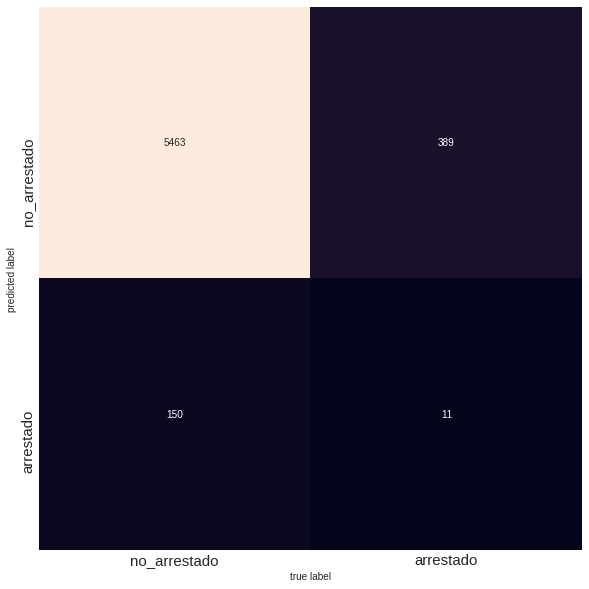

In [113]:
# matriz de confusión

leyenda=['no_arrestado','arrestado']
mat = confusion_matrix(y_test, predictions)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=leyenda, 
    yticklabels=leyenda
)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

- El mejor modelo obtenido fue RandomForest con SMOTE y usando todos los atributos disponibles.

### 2. MODELOS FORCE_PROCESS

- Se proponen **5** modelos predictivos:<BR>
    2.1 Logistic Regresion<BR>
    2.2 Random Forest<BR>
    2.3 AdaBoost<BR>
    2.4 GradientBoosting<BR>
    2.5 SVM

### 2.1 Logistic Regresion force_process

Para el algoritmo de Regresión Logística se realizará una búsqueda de hiperparámetros con GridSearchCV con los siguientes valores: C: 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 y penalty: 'l1', 'l2'

In [57]:
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}

logistic_gridcv = GridSearchCV(LogisticRegression(random_state = 1), params, cv=5, n_jobs=-1).fit(x_train_2,y_train_2)


La mejor combinación de hiperparametros que se obtuvo es:

In [58]:
logistic_gridcv.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [59]:
predictions_lr = logistic_gridcv.predict(x_test_2)
print(classification_report(y_test_2,predictions_lr))
print('accuracy: ', round(accuracy_score(y_test_2,predictions_lr),3))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      4437
           1       0.56      0.13      0.21      1403

    accuracy                           0.77      5840
   macro avg       0.67      0.55      0.54      5840
weighted avg       0.72      0.77      0.71      5840

accuracy:  0.766


### 2.2 Random Forest force_process

Para el algoritmo de RandomForest se realizará una búsqueda de hiperparámetros con GridSearchCV con los siguientes valores; max_features: None, 'log2' y 'sqrt'; n_estimators: 50, 100, 150, 200, 250, 500 y 'max_depth': None, 2, 5, 7, 10 

In [72]:
params = {'max_features': [None , 'log2' , 'sqrt'],'n_estimators': [50,100,150,200,250,500], 'max_depth':[None, 2,5,7,10]}

rf_model_gridcv_2 = GridSearchCV(RandomForestClassifier(random_state = 1), params, cv=5, n_jobs=-1).fit(x_train_2,y_train_2)

La mejor combinación de hiperparametros que se obtuvo es:

In [73]:
rf_model_gridcv_2.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 250}

In [74]:
predictions_rf = rf_model_gridcv_2.predict(x_test_2)
print(classification_report(y_test_2,predictions_rf))
print('accuracy: ', round(accuracy_score(y_test_2,predictions_rf),3))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      4437
           1       0.55      0.24      0.33      1403

    accuracy                           0.77      5840
   macro avg       0.67      0.59      0.60      5840
weighted avg       0.74      0.77      0.73      5840

accuracy:  0.77


### 2.3 AdaBoost force_process

Para el algoritmo de AdaBoost se realizará una búsqueda de hiperparámetros con GridSearchCV con los siguientes valores: learning_rate: 0.01, 0.1, 0.5 y n_estimators: 50, 100, 500, 1000, 2000

In [75]:
params = {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000]}

adaboost_gridcv_2 = GridSearchCV(AdaBoostClassifier(random_state = 1), params, cv=5, n_jobs=-1).fit(x_train_2,y_train_2)


La mejor combinación de hiperparametros que se obtuvo es:

In [76]:
adaboost_gridcv_2.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [77]:
predictions_ada = adaboost_gridcv_2.predict(x_test_2)
print(classification_report(y_test_2,predictions_ada))
print('accuracy: ', round(accuracy_score(y_test_2,predictions_ada),3))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      4437
           1       0.57      0.14      0.23      1403

    accuracy                           0.77      5840
   macro avg       0.68      0.55      0.55      5840
weighted avg       0.73      0.77      0.71      5840

accuracy:  0.768


### 2.4 GradientBoosting force_process

Para el algoritmo de GradientBoosting se realizará una búsqueda de hiperparámetros con GridSearchCV con los siguientes valores: learning_rate: 0.01, 0.1, 0.5; n_estimators: 50, 100, 500, 1000, 2000; subsample: 0.1, 0.5, 0.9

In [78]:
params = {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000],'subsample': [0.1,0.5,0.9]}

gradient_boost_gridcv_2 = GridSearchCV(GradientBoostingClassifier(random_state = 1), params, cv=5, n_jobs=-1).fit(x_train_2,y_train_2)


La mejor combinación de hiperparametros que se obtuvo es:

In [79]:
gradient_boost_gridcv_2.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000, 'subsample': 0.1}

In [80]:
predictions_gb = gradient_boost_gridcv_2.predict(x_test_2)
print(classification_report(y_test_2,predictions_gb))
print('accuracy: ', round(accuracy_score(y_test_2,predictions_gb),3))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4437
           1       0.50      0.28      0.36      1403

    accuracy                           0.76      5840
   macro avg       0.65      0.60      0.61      5840
weighted avg       0.73      0.76      0.73      5840

accuracy:  0.76


### 2.5 SVM force_process

Para SVM se realizará una búsqueda de hiperparámetros con GridSearchCV con los siguientes valores: C: 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 y'gamma': 0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10. Se utilizará un kernel por defecto 'rbf', ésto es porque los datos presentan una estructura no-lineal.

In [81]:
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

svm_gridcv_2 = GridSearchCV(SVC(kernel='rbf',random_state = 1), params, cv=5, n_jobs=-1).fit(x_train_2,y_train_2)


La mejor combinación de hiperparametros que se obtuvo es:

In [82]:
svm_gridcv_2.best_params_

{'C': 1, 'gamma': 0.1}

In [83]:
predictions_svm = svm_gridcv_2.predict(x_test_2)
print(classification_report(y_test_2,predictions_svm))
print('accuracy: ', round(accuracy_score(y_test_2,predictions_svm),3))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4437
           1       0.45      0.04      0.07      1403

    accuracy                           0.76      5840
   macro avg       0.61      0.51      0.47      5840
weighted avg       0.69      0.76      0.67      5840

accuracy:  0.758


### Elección de mejor modelo

In [88]:
promedios = [['LogisticRegression',recall_score(y_test_2,logistic_gridcv.predict(x_test_2),average = 'macro').round(3),
             accuracy_score(y_test_2,logistic_gridcv.predict(x_test_2)).round(3)],
            ['RandomForestClassifier',recall_score(y_test_2,rf_model_gridcv_2.predict(x_test_2),average = 'macro').round(3),
             accuracy_score(y_test_2,rf_model_gridcv_2.predict(x_test_2)).round(3)],
            ['AdaboostClassifier',recall_score(y_test_2,adaboost_gridcv_2.predict(x_test_2),average = 'macro').round(3),
             accuracy_score(y_test_2,adaboost_gridcv_2.predict(x_test_2)).round(3)],
            ['GradientBoostingClassifier',recall_score(y_test_2,gradient_boost_gridcv_2.predict(x_test_2),average = 'macro').round(3),
             accuracy_score(y_test_2,gradient_boost_gridcv_2.predict(x_test_2)).round(3)],
            ['SVC',recall_score(y_test_2,svm_gridcv_2.predict(x_test_2),average = 'macro').round(3),
             accuracy_score(y_test_2,svm_gridcv_2.predict(x_test_2)).round(3)]]
df_promedios = pd.DataFrame(promedios, columns = ['Modelo','Recall','Accuracy']).sort_values(by='Accuracy', ascending=False)

#### Desempeño de los modelos ordenados de mejor al peor

In [89]:
df_promedios

,Modelo,Recall,Accuracy
1,RandomForestClassifier,0.589,0.770
2,AdaboostClassifier,0.555,0.768
0,LogisticRegression,0.548,0.766
3,GradientBoostingClassifier,0.596,0.760
4,SVC,0.512,0.758


- En base a los resultados de todos los modelos entrenados, se obtuvo que los 2 mejores modelos fueron RandomForest y Adaboost, para esto es usó la métrica accuracy la cual indica el número de procedimientos violentos clasificados correctamente en comparación con el número total de procedimientos, y también se consideró recall para saber que proporción de procedimientos violentos reales fueron clasificados correctamente en comparación con el numero total de procedimientos violentos.
- Estos modelos serán serializados a continuación:

In [91]:
from  joblib import load,dump

dump(rf_model_gridcv_2.best_estimator_,'contreras_vera-RandomForestClassifier.joblib')
dump(adaboost_gridcv_2.best_estimator_,'contreras_vera-AdaboostClassifier.joblib')

['contreras_vera-AdaboostClassifier.joblib']

                                                            ***